# Digit Recognition

DSC-440 Project 2

Brian Chaffee

---
**Description:**

Using the MNIST dataset adapted from the Kaggle Competition. The objective is to create a Convolutional Neural Network that successfuly is able to predict the correct digit from 0 to 9 from a list of handwritten digits.

[Kaggle Link](https://www.kaggle.com/competitions/digit-recognizer/code?competitionId=3004&sortBy=voteCount&excludeNonAccessedDatasources=true)
- The only adaptation is using `tensorflow.keras.datasets` instead of the provided datasets.

## Imports

In [34]:
# Imports
# # Basic Imports
import pandas as pd
import numpy as np

# # Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


# # # Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # # Metrics
from sklearn.metrics import confusion_matrix

# # Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

Utilizing the tensorflow library to load in the dataset

In [3]:
from tensorflow.keras.datasets import mnist

# Loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the shape of the training and testing data to determine how they are structured for the model

In [4]:
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In order to better visualize what we are working with; we visualize an example of 5 points to see what the data looks like.

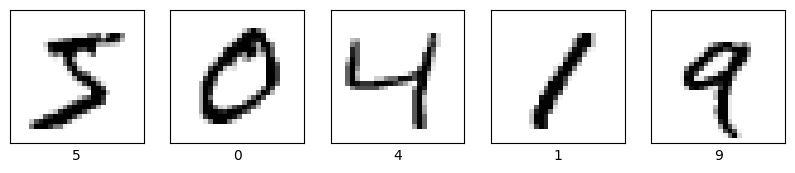

In [11]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Data Preprocessing

### Normalizing

Because the initial values range from 0 to 255, they are normalized to be in gray scale, or from 0 to 1

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    
    rotation_range = 10,        # rotate image randomly within range of 10 degrees
    width_shift_range = 0.0,    # shift image horizontally
    height_shift_range = 0.0,   # shift image vertically
)

datagen.fit(X_train)

## CNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

NameError: name 'train_test_split' is not defined

### Defining Model

In [35]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
epochs = 1


In [ ]:
model1 = models.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D()
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/brianchaffee/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Optimizer and Annealer

## Evaluating the Model

In [31]:
# Train the mode
model1.fit(datagen.flow(X_train, y_train, batch_size=42),
          epochs=10)

# Evaluate the model
test_loss, test_acc = model1.evaluate(X_train, y_train, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10


/Users/brianchaffee/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1429/1429 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1067 - loss: 2.3019
Epoch 2/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1129 - loss: 2.3016
Epoch 3/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1114 - loss: 2.3017
Epoch 4/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.1117 - loss: 2.3016
Epoch 5/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.1116 - loss: 2.3015
Epoch 6/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1113 - loss: 2.3016
Epoch 7/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.1123 - loss: 2.3013
Epoch 8/10
 528/1429 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1138 - loss: 2.3010

KeyboardInterrupt: 

### Confusion Matrix

In [32]:
# Predict the test set
y_pred = np.argmax(model1.predict(X_test), axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

NameError: name 'model1' is not defined

---
## Citations

1. LeCun, Y., Cortes, C., & Burges, C. J. (2010). MNIST handwritten digit database. ATT Labs [Online].  Available: Http://Yann. Lecun. Com/Exdb/Mnist, 2.